In [4]:
import neurokit2 as nk
import torch
from ptbxlae.dataprocessing.ptbxlDS import PtbxlDM
from ptbxlae.dataprocessing import plot_raw_data
import pandas as pd
from tqdm.auto import tqdm

dm = PtbxlDM(root_folder="../data/ptbxl")
dm.setup(stage="test")
dl = dm.test_dataloader()

signals = torch.cat([x for x in tqdm(dl)]).cpu().detach().numpy()
signals.shape

  0%|          | 0/48 [00:00<?, ?it/s]

(1505, 12, 5000)

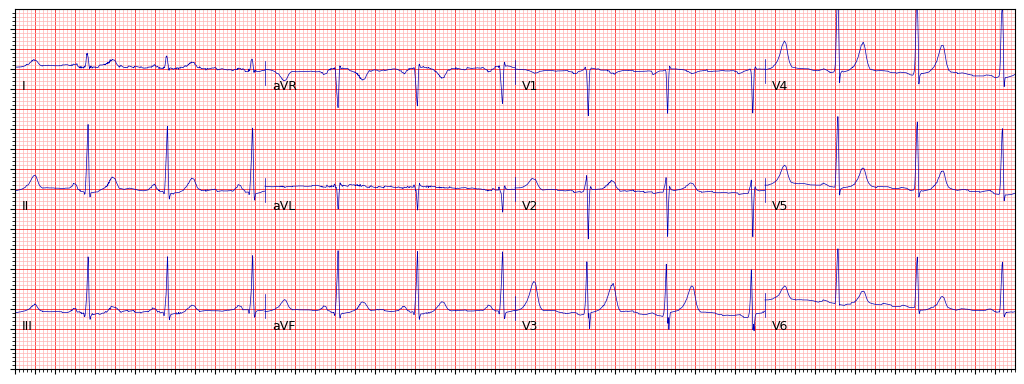

In [6]:
SAMPLE_IDX = 1337

plot_raw_data(signals[SAMPLE_IDX,:,0:500], {'fs': 500})

In [25]:
signals.shape

(1505, 12, 5000)

176.75
379.25


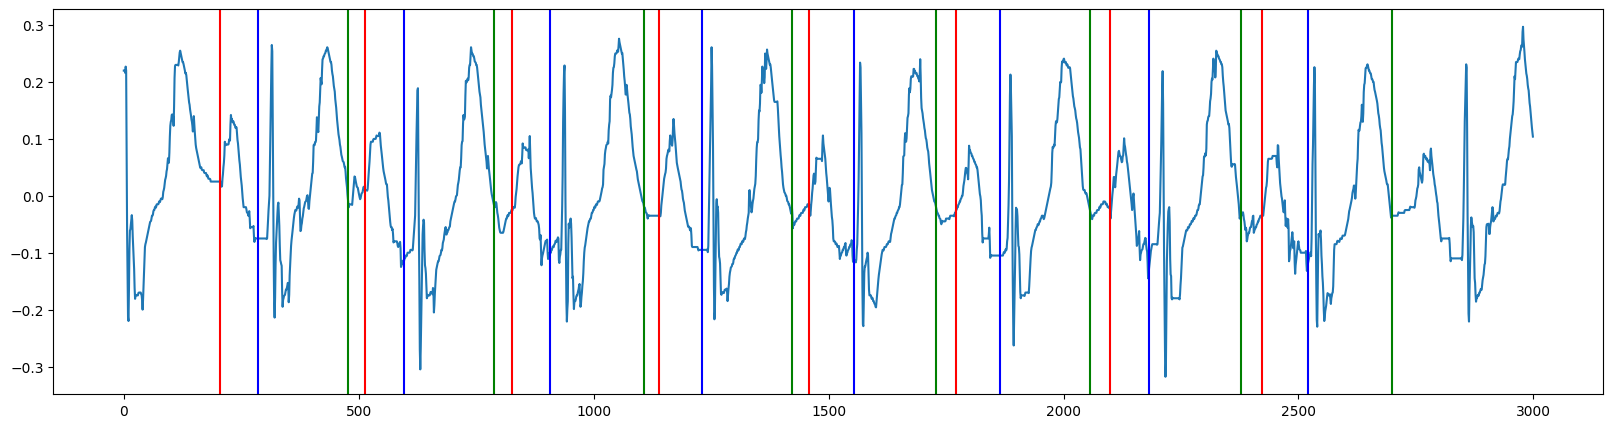

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 5]

SAMPLE_IDX = 754
CHANNEL = 1
WINDOW = 3000

processed_sig, info = nk.ecg_process(signals[SAMPLE_IDX,CHANNEL,0:WINDOW], sampling_rate=500)
p_onset = [x for x in info['ECG_P_Onsets'] if not np.isnan(x)]
q_onset = [x for x in info['ECG_Q_Peaks'] if not np.isnan(x)]
t_offset = [x for x in info['ECG_T_Offsets'] if not np.isnan(x)]

plt.plot(range(0, WINDOW), signals[SAMPLE_IDX, CHANNEL, 0:WINDOW])

pr_ints = list()
qt_ints = list()
for (p, q, t) in zip(p_onset, q_onset, t_offset):
    plt.axvline(p, color='r')
    plt.axvline(q, color='b')
    plt.axvline(t, color='g')

    pr_ints.append(q - p)
    qt_ints.append(t - q)
    # plt.plot(r_peaks, [1.5] *  len(r_peaks), 'ro')
    # plt.plot(p_peaks, [0.1] *  len(p_peaks), 'bo')
    # plt.plot(t_peaks, [0.3] *  len(t_peaks), 'go')

print(((sum(pr_ints) / len(pr_ints)) / 500) * 1000)
print(((sum(qt_ints) / len(qt_ints)) / 500) * 1000)
